<a href="https://colab.research.google.com/github/hsantos1985/neural_network_mba_project/blob/main/ANALISE_SENTIMENTO_OLIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OBJETIVO
Este notebook tem como objetivo criar um modelo de análise de sentimento para uma base de avaliações de clientes da empresa OLIST.
Foram aplicados modelos de redes neurais Densas e a LSTM (Long Short-Term Memory Networks)
Este trabalho foi desenvolvido dentro do programa de MBA da FIA.

Foram feitas as principais etapas:

1-Processamento do texto

  Preparação das avaliações para se aplicar os modelos de redes neurais.
  O que inclui a tokenização e padding

2-Criação dos modelos

  Foram aplicados os modelos de redes Densas e LSTM

3-Nuvem de plavras

Apresentar quais são as principais palavras positivas e negativas comparadas com o modelo e a base real

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

!pip install unidecode
from unidecode import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1- OBTENÇÃO DA BASE DE DADOS

In [ ]:
#OLIST ORDER REVIEWS
olist_principal= pd.read_csv('/content/drive/MyDrive/dataset_projeto/olist_order_reviews_dataset.csv')
olist_principal


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#2-ANÁLISE PRELIMINAR E CRIAÇÃO DE COLUNAS DA BASE DE DADOS

In [ ]:
# Contar o número de pedidos únicos
qtd_olist_unico = olist_principal['order_id'].nunique()
# Imprimir o resultado usando f-strings
print(f'QTD pedidos únicos: {qtd_olist_unico}')

QTD pedidos únicos: 98673


In [ ]:
# Print do shape e contagem/porcentagem de 'review_score'
print("Shape of olist_principal:", olist_principal.shape)

# Obter categorias únicas em 'review_score' e ordenar
review_score_categories = sorted(olist_principal['review_score'].unique())

# Exibir a contagem e porcentagem de 'review_score' para cada valor único
print("\nAnálise por review_score:\n")
for review_score_category in review_score_categories:
    print(f"Para 'review_score' = {review_score_category}:")

    # Filtrar o DataFrame para a categoria específica de 'review_score'
    subset = olist_principal[olist_principal['review_score'] == review_score_category]

    # Calcular a contagem e porcentagem para a categoria atual
    count = len(subset)
    percentage = (count / len(olist_principal)) * 100

    # Exibir a contagem e porcentagem
    print(f"  Contagem: {count}")
    print(f"  Porcentagem: {percentage:.2f}%")

    print()  # Linha em branco para separar os grupos

Shape of olist_principal: (99224, 7)

Análise por review_score:

Para 'review_score' = 1:
  Contagem: 11424
  Porcentagem: 11.51%

Para 'review_score' = 2:
  Contagem: 3151
  Porcentagem: 3.18%

Para 'review_score' = 3:
  Contagem: 8179
  Porcentagem: 8.24%

Para 'review_score' = 4:
  Contagem: 19142
  Porcentagem: 19.29%

Para 'review_score' = 5:
  Contagem: 57328
  Porcentagem: 57.78%



In [ ]:
olist_principal.shape

(99224, 7)

In [ ]:
#retirada dos reiews diferentes de 3
olist_principal=(
olist_principal[olist_principal['review_score'] != 3].reset_index(drop=True)
)
olist_principal

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
91040,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
91041,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
91042,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
91043,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
olist_principal['classe']=  np.where(
    olist_principal['review_score']>=4,'positivo','negativo'
)
olist_principal

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,classe
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,positivo
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,positivo
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,positivo
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,positivo
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,positivo
...,...,...,...,...,...,...,...,...
91040,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,positivo
91041,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,positivo
91042,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,positivo
91043,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,positivo


In [ ]:
olist_principal['review'] = np.where(
    olist_principal['review_comment_message'].isna(), 'sem review', 'com review'
)
olist_principal

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,classe,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,positivo,sem review
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,positivo,sem review
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,positivo,sem review
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,positivo,com review
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,positivo,com review
...,...,...,...,...,...,...,...,...,...
91040,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,positivo,sem review
91041,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,positivo,sem review
91042,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,positivo,com review
91043,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,positivo,sem review


In [ ]:
# Obter categorias únicas em 'review_comment_message'
review_categories = olist_principal['review'].unique()

# Exibir a contagem e porcentagem de 'classe' para cada categoria de 'review_comment_message'
for review_category in review_categories:
    print(f"Para '{review_category}':")

    # Filtrar o DataFrame para a categoria específica de 'review_comment_message'
    subset = olist_principal[olist_principal['review'] == review_category]

    # Calcular a contagem e porcentagem para 'classe'
    value_counts_classe = subset['classe'].value_counts()
    percentage_counts_classe = (value_counts_classe / len(subset)) * 100

    # Exibir a contagem e porcentagem
    for category in value_counts_classe.index:
        print(f" Classe: {category} - Contagem: {value_counts_classe[category]}, Porcentagem: {percentage_counts_classe[category]:.2f}%")



Para 'sem review':
 Classe: positivo - Contagem: 49940, Porcentagem: 93.13%
 Classe: negativo - Contagem: 3685, Porcentagem: 6.87%
Para 'com review':
 Classe: positivo - Contagem: 26530, Porcentagem: 70.90%
 Classe: negativo - Contagem: 10890, Porcentagem: 29.10%


In [ ]:
olist_principal = olist_principal[olist_principal['review_comment_message'].notna()].reset_index(drop=True)
olist_principal

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,classe,review
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,positivo,com review
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,positivo,com review
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,positivo,com review
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,positivo,com review
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,positivo,com review
...,...,...,...,...,...,...,...,...,...
37415,5085bc489aa6b58a29c4f922d59ff826,18ed848509774f56cc8c1c0a1903ad7f,2,NaN,Tive um problema na entrega em que o correio c...,2018-02-21 00:00:00,2018-02-23 11:43:12,negativo,com review
37416,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,positivo,com review
37417,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,positivo,com review
37418,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,positivo,com review


In [ ]:
# Contar o número de pedidos únicos
qtd_olist_unico = olist_principal['order_id'].nunique()
# Imprimir o resultado usando f-strings
print(f'QTD pedidos únicos: {qtd_olist_unico}')

QTD pedidos únicos: 37299


#3-CRIAÇÃO DA ABT

In [ ]:
#CRIAÇÃO D ABT
abt = olist_principal[['review_comment_message','classe']]
abt

,review_comment_message,classe
0,Recebi bem antes do prazo estipulado.,positivo
1,Parabéns lojas lannister adorei comprar pela I...,positivo
2,aparelho eficiente. no site a marca do aparelh...,positivo
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo
4,"Vendedor confiável, produto ok e entrega antes...",positivo
...,...,...
37415,Tive um problema na entrega em que o correio c...,negativo
37416,para este produto recebi de acordo com a compr...,positivo
37417,Entregou dentro do prazo. O produto chegou em ...,positivo
37418,"Excelente mochila, entrega super rápida. Super...",positivo


In [ ]:
#CRIANDO A COLUNA TARGET
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
abt['target'] = le.fit_transform(abt['classe'])
abt.head(10)

<ipython-input-15-2f7dc9526d41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt['target'] = le.fit_transform(abt['classe'])


,review_comment_message,classe,target
0,Recebi bem antes do prazo estipulado.,positivo,1
1,Parabéns lojas lannister adorei comprar pela I...,positivo,1
2,aparelho eficiente. no site a marca do aparelh...,positivo,1
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo,1
4,"Vendedor confiável, produto ok e entrega antes...",positivo,1
5,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",negativo,0
6,Péssimo,negativo,0
7,Loja nota 10,positivo,1
8,obrigado pela atençao amim dispensada,positivo,1
9,A compra foi realizada facilmente.\r\nA entreg...,positivo,1


#4-PROCESSAMENTO DO TEXTO

In [ ]:
import tensorflow

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, TimeDistributed, CategoryEncoding, Flatten

In [ ]:
#tokenização das palavras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(abt['review_comment_message']) #Treina o Tokenizer no conjunto de frases.
abt['comentarios_tokenizados'] = tokenizer.texts_to_sequences(abt['review_comment_message'])

<ipython-input-18-aa75e07b7965>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt['comentarios_tokenizados'] = tokenizer.texts_to_sequences(abt['review_comment_message'])


In [ ]:
abt

,review_comment_message,classe,target,comentarios_tokenizados
0,Recebi bem antes do prazo estipulado.,positivo,1,"[15, 26, 12, 5, 8, 211]"
1,Parabéns lojas lannister adorei comprar pela I...,positivo,1,"[69, 157, 58, 82, 72, 105, 436, 604, 3, 591, 6..."
2,aparelho eficiente. no site a marca do aparelh...,positivo,1,"[441, 325, 16, 63, 4, 390, 5, 441, 130, 2189, ..."
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo,1,"[32, 22, 164, 3513, 84, 168, 756, 57, 20]"
4,"Vendedor confiável, produto ok e entrega antes...",positivo,1,"[120, 352, 1, 100, 3, 11, 12, 5, 8]"
...,...,...,...,...
37415,Tive um problema na entrega em que o correio c...,negativo,0,"[93, 22, 110, 30, 11, 24, 10, 2, 200, 2557, 16..."
37416,para este produto recebi de acordo com a compr...,positivo,1,"[27, 247, 1, 15, 6, 246, 14, 4, 38, 462]"
37417,Entregou dentro do prazo. O produto chegou em ...,positivo,1,"[141, 50, 5, 8, 2, 1, 13, 24, 194, 252, 45, 9,..."
37418,"Excelente mochila, entrega super rápida. Super...",positivo,1,"[40, 374, 11, 44, 49, 44, 17, 162, 34]"


In [ ]:
#erificação do max length dos comentários
max_length = max(len(i) for i in abt['comentarios_tokenizados'])
max_length

45

In [ ]:
#aplicação do padding
padded_seq=pad_sequences(abt['comentarios_tokenizados'], maxlen=max_length, padding='post')
padded_seq

array([[ 15,  26,  12, ...,   0,   0,   0],
       [ 69, 157,  58, ...,   0,   0,   0],
       [441, 325,  16, ...,   0,   0,   0],
       ...,
       [141,  50,   5, ...,   0,   0,   0],
       [ 40, 374,  11, ...,   0,   0,   0],
       [ 39,   1,  13, ...,   0,   0,   0]], dtype=int32)

In [ ]:
#codificação dos rotulos
labels = np.array(abt['target'])
labels

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(padded_seq, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(29936, 45)

In [ ]:
# Calcula o tamanho do vocabulário, adicionando 1 para incluir o índice zero reservado para padding.
vocab_size = len(tokenizer.word_index) + 1
vocab_size

15152

In [ ]:
# Dimensão do vetor de embedding
X_train.shape[0]

29936

In [ ]:
embedding_dim=X_train.shape[0]

#3-CRIAÇÃO DOS MODELOS

##3.1- MODELO REDE DENSA

In [ ]:
# Modelo Denso (MLP)
model_dense_embedding = Sequential()
model_dense_embedding.add(Input(shape=(max_length, 1)))
model_dense_embedding.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_dense_embedding.add(Flatten())  # Achatar a saída para entrada na camada densa
model_dense_embedding.add(Dense(units=32, activation='relu'))
model_dense_embedding.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#salvar o modelo
model_dense_embedding.save('model_dense_embedding.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Carregando o modelo salvo
#from tensorflow.keras.models import load_model
#model_dense_embedding = load_model('model_dense_embedding.h5')

In [ ]:
#COMPILAÇÃO DO MODELO
model_dense_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#treino do modelo
#import tensorflow as tf
#with tf.device('/device:GPU:0'):
historico = model_dense_embedding.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
300/300 [==============================] - 60s 189ms/step - loss: 0.4698 - accuracy: 0.8833
Epoch 2/10
300/300 [==============================] - 43s 145ms/step - loss: 0.0994 - accuracy: 0.9673
Epoch 3/10
300/300 [==============================] - 40s 133ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 4/10
300/300 [==============================] - 41s 135ms/step - loss: 0.0351 - accuracy: 0.9899
Epoch 5/10
300/300 [==============================] - 40s 132ms/step - loss: 0.0308 - accuracy: 0.9911
Epoch 6/10
300/300 [==============================] - 39s 129ms/step - loss: 0.0297 - accuracy: 0.9912
Epoch 7/10
300/300 [==============================] - 39s 129ms/step - loss: 0.0349 - accuracy: 0.9895
Epoch 8/10
300/300 [==============================] - 39s 129ms/step - loss: 0.0464 - accuracy: 0.9854
Epoch 9/10
300/300 [==============================] - 39s 129ms/step - loss: 0.0432 - accuracy: 0.9875
Epoch 10/10
300/300 [==============================] - 38s 126ms/step - l

In [ ]:
# Avaliação do modelo
loss, accuracy = model_dense_embedding.evaluate(X_test, y_test)
print(f'model_dense_embedding: {loss:.4f}, Accuracy: {accuracy:.4f}')

234/234 [==============================] - 1s 5ms/step - loss: 0.4894 - accuracy: 0.9114
model_dense_embedding: 0.4894, Accuracy: 0.9114


In [ ]:
#CRIAÇÃO DA MATRIZ DE CONFUSÃO
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#ponto de corte
abt['target'].mean()

0.7089791555318011

234/234 [==============================] - 1s 4ms/step


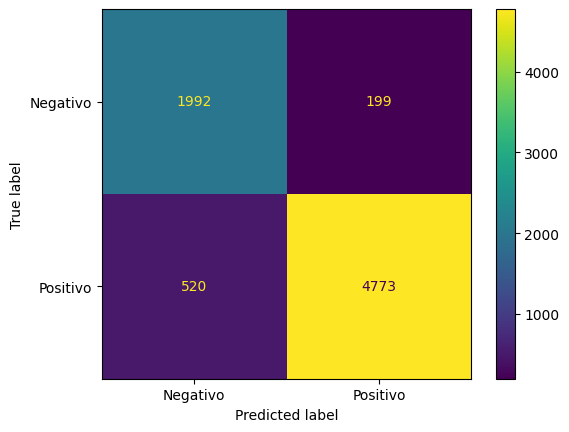

In [ ]:
#criação das probabilidades
y_pred_prob = model_dense_embedding.predict(X_test)

#estabelecendo o ponto de corte
y_pred = (y_pred_prob > abt['target'].mean()).astype(int)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp.plot(values_format='d')

In [ ]:
#metricas
from sklearn.metrics import balanced_accuracy_score,accuracy_score, precision_score, recall_score, f1_score
# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir as métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Acurácia: 0.9039
Acurácia balanceada: 0.9055
Precisão: 0.9600
Recall: 0.9018
F1-Score: 0.9300


##3.2-LSTM

In [ ]:
#modelo com Category Enconding

num_tokens = vocab_size

model_lstm_onehot = Sequential()
model_lstm_onehot.add(Input(shape=(max_length, 1)))
model_lstm_onehot.add(TimeDistributed(CategoryEncoding(num_tokens=num_tokens, output_mode='one_hot')))
model_lstm_onehot.add(LSTM(units=32))
model_lstm_onehot.add(Dense(units=1, activation='sigmoid'))  # Camada de saída com sigmoide

In [ ]:
#salvar o modelo
model_lstm_onehot.save('model_lstm_onehot.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Compilação do modelo
model_lstm_onehot.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
historico2 = model_lstm_onehot.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
300/300 [==============================] - 11s 23ms/step - loss: 0.3068 - accuracy: 0.8693
Epoch 2/10
300/300 [==============================] - 6s 22ms/step - loss: 0.1626 - accuracy: 0.9436
Epoch 3/10
300/300 [==============================] - 7s 23ms/step - loss: 0.1307 - accuracy: 0.9570
Epoch 4/10
300/300 [==============================] - 6s 22ms/step - loss: 0.1141 - accuracy: 0.9643
Epoch 5/10
300/300 [==============================] - 7s 22ms/step - loss: 0.1013 - accuracy: 0.9694
Epoch 6/10
300/300 [==============================] - 6s 21ms/step - loss: 0.0905 - accuracy: 0.9737
Epoch 7/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0869 - accuracy: 0.9751
Epoch 8/10
300/300 [==============================] - 6s 21ms/step - loss: 0.0787 - accuracy: 0.9786
Epoch 9/10
300/300 [==============================] - 7s 23ms/step - loss: 0.0748 - accuracy: 0.9794
Epoch 10/10
300/300 [==============================] - 6s 21ms/step - loss: 0.0726 - accur

In [ ]:
# Avaliação do modelo
loss, accuracy = model_lstm_onehot.evaluate(X_test, y_test)
print(f'model_lstm_onehot - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

234/234 [==============================] - 2s 6ms/step - loss: 0.2718 - accuracy: 0.9182
model_lstm_onehot - Loss: 0.2718, Accuracy: 0.9182


234/234 [==============================] - 1s 5ms/step


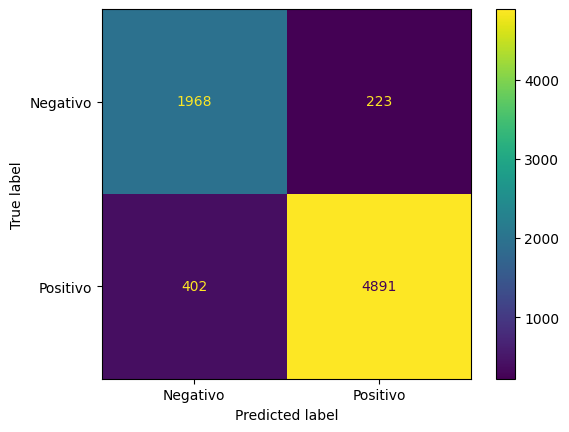

In [ ]:
#criação das probabilidades
y_pred_prob2 = model_lstm_onehot.predict(X_test)
y_pred2 = (y_pred_prob2 > abt['target'].mean()).astype(int)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred2)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp.plot(values_format='d')

In [ ]:
#metricas
from sklearn.metrics import balanced_accuracy_score,accuracy_score, precision_score, recall_score, f1_score
# Calcular as métricas
accuracy2 = accuracy_score(y_test, y_pred2)
balanced_accuracy2 = balanced_accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)

# Exibir as métricas
print(f'Acurácia: {accuracy2:.4f}')
print(f'Acurácia balanceada: {balanced_accuracy2:.4f}')
print(f'Precisão: {precision2:.4f}')
print(f'Recall: {recall2:.4f}')
print(f'F1-Score: {f12:.4f}')

Acurácia: 0.9165
Acurácia balanceada: 0.9111
Precisão: 0.9564
Recall: 0.9241
F1-Score: 0.9399


In [ ]:
#TABELA COMPARATIVA ENTRE OS 2 MODELOS
tabela_comparativa=pd.DataFrame(
    [
 ['Rede densa',accuracy,balanced_accuracy,precision,recall,f1],
 ['LSTM',accuracy2,balanced_accuracy2,precision2,recall2,f12],
    ],
    columns=['modelo','acuracia','acuracia_balanceada', 'precision', 'recall', 'f1']
)
tabela_comparativa


,modelo,acuracia,acuracia_balanceada,precision,recall,f1
0,Rede densa,0.918226,0.905465,0.959976,0.901757,0.929956
1,LSTM,0.916489,0.911135,0.956394,0.924051,0.939944


In [ ]:
#CONCLUSÃO

"""
O modelo com a rede densa obteve acurácia maior que a LSTM. Além disso, precision é maior.
Contudo, LSTM obteve maior acurácia balanceada e f1 score, além do recall maior que da rede densa.
Desta forma, considerando, o desbalanceamento da base que o LST é um modelo mais adequada
"""

'\nO modelo com a rede densa obteve acurácia maior que a LSTM. Além disso, precision é maior.\nContudo, LSTM obteve maior acurácia balanceada e f1 score, além do recall maior que da rede densa.\nDesta forma, considerando, o desbalanceamento da base que o LST é um modelo mais adequada\n'

#5-NUVEM DE PALAVRAS

In [ ]:
#tratando o texto
full_text = ' '.join(abt['review_comment_message'])



In [ ]:
# cria o objeto da figura da word cloud
from wordcloud import WordCloud
wc = WordCloud(background_color='black').generate(full_text)

##5.1-Nuvem das palavras gerais

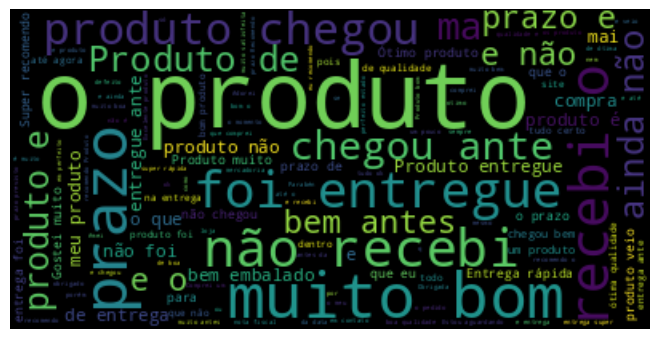

In [ ]:
# plota a word cloud geral
import matplotlib.pyplot as plt

plt.imshow(wc, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

##5.2 - Nuvem de palavras - classe positiva

#5.2.1-Classificação real

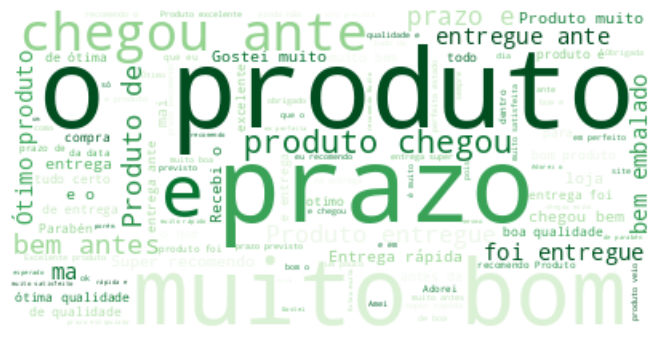

In [ ]:
full_text_positive = ' '.join(abt.query('classe=="positivo"')['review_comment_message'])
wc2 = WordCloud(background_color='white',colormap='Greens').generate(full_text_positive)
plt.imshow(wc2, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

##5.2.2-Classificação modelo LSTM

In [ ]:
#nuvem de palaras positiva de acordo com o modelo
#estabelecendo a abt nova para criar uma coluna do modelo
abt2=abt

In [ ]:
abt2.head(10)

,review_comment_message,classe,target,comentarios_tokenizados
0,Recebi bem antes do prazo estipulado.,positivo,1,"[15, 26, 12, 5, 8, 211]"
1,Parabéns lojas lannister adorei comprar pela I...,positivo,1,"[69, 157, 58, 82, 72, 105, 436, 604, 3, 591, 6..."
2,aparelho eficiente. no site a marca do aparelh...,positivo,1,"[441, 325, 16, 63, 4, 390, 5, 441, 130, 2189, ..."
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo,1,"[32, 22, 164, 3513, 84, 168, 756, 57, 20]"
4,"Vendedor confiável, produto ok e entrega antes...",positivo,1,"[120, 352, 1, 100, 3, 11, 12, 5, 8]"
5,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",negativo,0,"[192, 6, 186, 2, 10, 318, 68, 15, 3, 162, 38, ..."
6,Péssimo,negativo,0,[323]
7,Loja nota 10,positivo,1,"[34, 87, 151]"
8,obrigado pela atençao amim dispensada,positivo,1,"[128, 105, 3100, 7099, 5150]"
9,A compra foi realizada facilmente.\r\nA entreg...,positivo,1,"[4, 38, 19, 462, 2190, 20, 4, 11, 19, 837, 9, ..."


In [ ]:
X_train

array([[  2,  10, 156, ...,   0,   0,   0],
       [ 43,   9,   6, ...,   0,   0,   0],
       [103,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   6,  71, ...,   0,   0,   0],
       [ 11,  49,   3, ...,   0,   0,   0],
       [ 18, 115,  42, ...,   0,   0,   0]], dtype=int32)

In [ ]:
padded_seq_abt2 = pad_sequences(abt2['comentarios_tokenizados'], maxlen=max_length, padding='post')


In [ ]:
abt2['proba_lstm'] = model_lstm_onehot.predict(padded_seq_abt2)

1170/1170 [==============================] - 7s 6ms/step


<ipython-input-124-c22a768c0102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt2['proba_lstm'] = model_lstm_onehot.predict(padded_seq_abt2)


In [ ]:
pc=abt['target'].mean()
abt2['classe_lstm'] = np.where(abt2['proba_lstm'] >= pc, 'positivo', 'negativo')

<ipython-input-125-12fe665ff0e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt2['classe_lstm'] = np.where(abt2['proba_lstm'] >= pc, 'positivo', 'negativo')


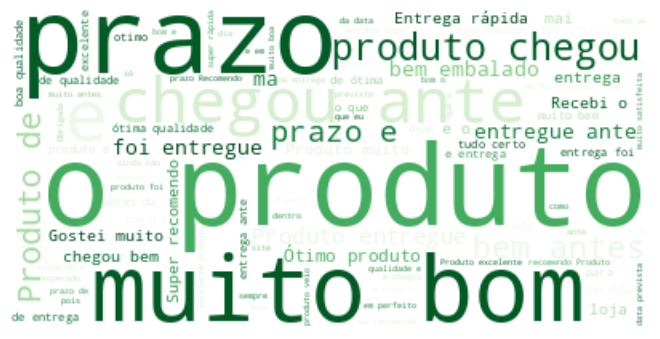

In [ ]:
full_text_positive2 = ' '.join(abt2.query('classe=="positivo"')['review_comment_message'])
wc3 = WordCloud(background_color='white',colormap='Greens').generate(full_text_positive2)
plt.imshow(wc3, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
"""
As palavras positivas mais destacadas aparentemente estão parecidas com as palavras destacadas pela classe do modelo
"""

'\nAs palavras positivas mais destacadas aparentemente estão parecidas com as palavras destacadas pela classe do modelo\n'

##5.3 - Nuvem de palavras - classe negativa

##5.3.1-Classe real

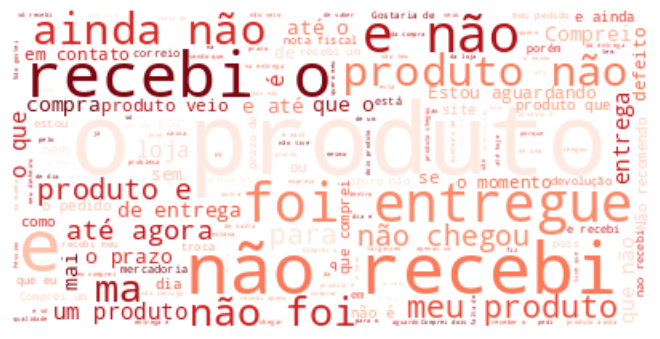

In [ ]:
full_text_negativa = ' '.join(abt.query('classe=="negativo"')['review_comment_message'])
wc3 = WordCloud(background_color='white',colormap='Reds').generate(full_text_negativa)
plt.imshow(wc3, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

##5.3.2 - Classificação do modelo LSTM

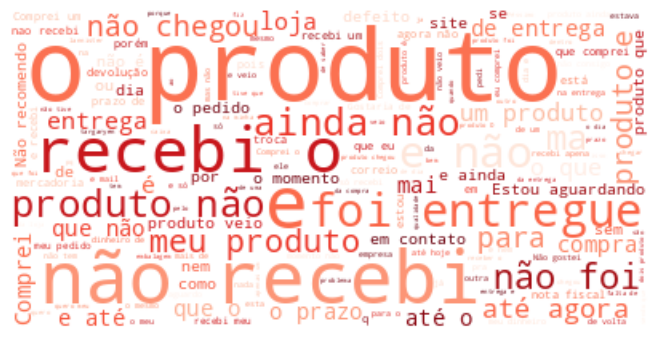

In [ ]:
full_text_negativo2 = ' '.join(abt2.query('classe=="negativo"')['review_comment_message'])
wc3 = WordCloud(background_color='white',colormap='Reds').generate(full_text_negativo2)
plt.imshow(wc3, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
"""

A classe negativa predita pelo modelo apresenta palavras semelhante as comparadas com a classe positiva real.

"""

'\n\nA classe negativa predita pelo modelo apresenta palavras semelhante as comparadas com a classe positiva real.\n\n'

#6 - CONCLUSÃO

In [ ]:
"""
Foi possível se obter um modelo de análise de sentimento utilizando o LSTM com acurácia de 91,6%, F1 score de 93,9% e acurácia balanceada de 91,1%.
Estes indicadores mostram que o modelo está satisfatório.
A nuvem de palavras comparativas entre o real e o modelo apresenta muita semelhança, isto é, para as classificações positivas e negativas
entre a base real e a do modelo estão muito semelhantes
"""

'\nFoi possível se obter um modelo de análise de sentimento utilizando o LSTM com acurácia de 91,6%, F1 score de 93,9% e acurácia balanceada de 91,1%.\nEstes indicadores mostram que o modelo está satisfatório.\nA nuvem de palavras comparativas entre o real e o modelo apresenta muita semelhança, isto é, para as classificações positivas e negativas \nentre a base real e a do modelo estão muito semelhantes\n'